# Importing Required Libraries

In [ ]:
from google.colab import files
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics

# Time Series
import statsmodels.api as stm
from pylab import rcParams

# ADFuller
from statsmodels.tsa.stattools import adfuller

#Facebook Prophet
from prophet import Prophet

In [ ]:
# Reading the dataset

df = pd.read_csv('https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv', index_col = 'FullDate', parse_dates= True)
df.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [ ]:
df.shape

(92016, 4)

In [ ]:
df.isna().sum()

Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [ ]:
# Resampling to Daily Rate

df_copy = df.copy()
df2 = df_copy.resample('D').sum()

In [ ]:
df2.shape

(3834, 4)

In [ ]:
df2.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.380,88.56,2751.700
2010-09-02,369.6,38898.990,88.56,570.810
2010-09-03,439.2,41665.760,106.80,504.975
2010-09-04,328.8,35638.085,81.36,502.275
2010-09-05,357.6,35611.410,106.80,500.555


In [ ]:
roll_mean = df2.rolling(window = 30).mean()
roll_std = df2.rolling(window = 30).std()

Text(0, 0.5, 'ElecPrice')

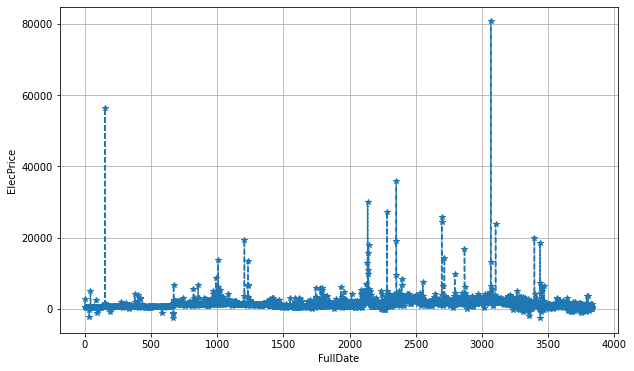

In [ ]:
plt.figure(figsize=( 10 , 6 ))
plt.plot(df2.index, df2.ElecPrice, '--' , marker= '*' , )
plt.grid()
plt.xlabel( 'FullDate' )
plt.ylabel( 'ElecPrice' )

# Plot to Compare Power consumed with respect to Time in Years

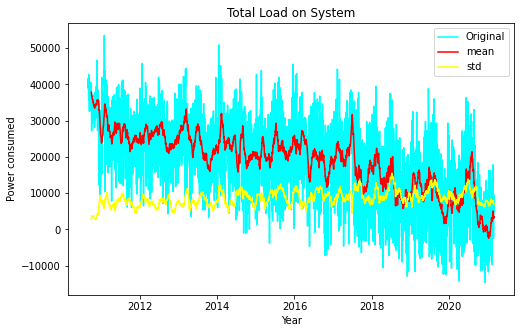

In [ ]:
plt.figure(figsize = (8,5))
plt.plot(df2.index, df2.SysLoad, color='cyan', label = 'Original')
plt.plot(roll_mean.SysLoad, color = 'red', label = 'mean')
plt.plot(roll_std.SysLoad, color = 'yellow', label = 'std')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Power consumed")
plt.title("Total Load on System")
plt.show()

# Plot to compare Gas Price with respect to Time in Years

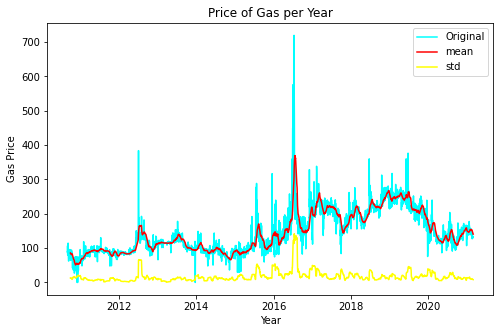

In [ ]:
plt.figure(figsize = (8,5))
plt.plot(df2.index, df2.GasPrice,color='cyan', label = 'Original')
plt.plot(roll_mean.GasPrice, color = 'red', label = 'mean')
plt.plot(roll_std.GasPrice, color = 'yellow', label = 'std')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Gas Price")
plt.title("Price of Gas per Year")
plt.show()

# Plot to Compare Price of Electricity with respect to Time in Years

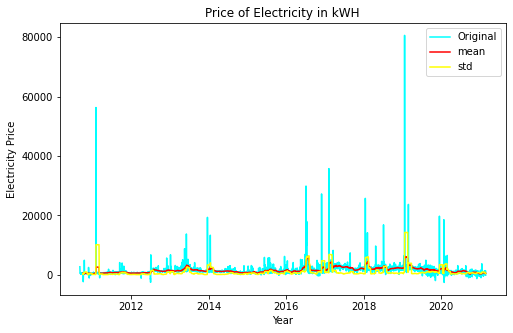

In [ ]:
plt.figure(figsize = (8,5))
plt.plot(df2.index, df2.ElecPrice,color='cyan', label = 'Original')
plt.plot(roll_mean.ElecPrice, color = 'red', label = 'mean')
plt.plot(roll_std.ElecPrice, color = 'yellow', label = 'std')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Electricity Price")
plt.title('Price of Electricity in kWH')
plt.show()  

# Stationary Test using ADFuller

In [ ]:
def stationary_test(dataset):
  df_test = adfuller(dataset, autolag='AIC')
  adf = pd.Series(df_test[0:4], index = ['Test Statistics', 'p-value', '# Lags', '# observations'])

  for key, value in df_test[4].items():
    adf['Critical Value (%s)' %key] = value
  print(adf)

  p = adf['p-value']
  if p <= 0.05:
    print("\n Series is Stationary")
  else:
    print("\n Series is Non Stationary")


## Stationary Test for SysLoad

In [ ]:
stationary_test(df2.SysLoad)

Test Statistics           -3.690159
p-value                    0.004254
# Lags                    30.000000
# observations          3803.000000
Critical Value (1%)       -3.432071
Critical Value (5%)       -2.862300
Critical Value (10%)      -2.567175
dtype: float64

 Series is Stationary


# Stationary Test for GasPrice

In [ ]:
stationary_test(df2.GasPrice)

Test Statistics           -2.902767
p-value                    0.045027
# Lags                    27.000000
# observations          3806.000000
Critical Value (1%)       -3.432069
Critical Value (5%)       -2.862300
Critical Value (10%)      -2.567174
dtype: float64

 Series is Stationary


## Stationary Test for Electricity Price

In [ ]:
stationary_test(df2.ElecPrice)

Test Statistics        -8.269054e+00
p-value                 4.848818e-13
# Lags                  2.000000e+01
# observations          3.813000e+03
Critical Value (1%)    -3.432066e+00
Critical Value (5%)    -2.862298e+00
Critical Value (10%)   -2.567174e+00
dtype: float64

 Series is Stationary


# Additional Instructions for (14-16)<br/>
 Using the daily sampling rate (sum), divide the data into a train and test set. The first 2757 days is your train set and the last (x-2757) days is your test set. Where x is the length of the dataset. Use Facebook Prophet to train a Univariate time series model using the FullDate column as (‘dt’ or ‘ds’) and ElecPrice as ( ‘y’). Answer question 14 - 16

In [ ]:
df2.reset_index(inplace = True)
data = df2[["FullDate", "ElecPrice"]]

In [ ]:
data.shape

(3834, 2)

In [ ]:
data.head()

,FullDate,ElecPrice
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [ ]:
data = data.rename(columns = {"FullDate" : "ds", "ElecPrice" : "y"})
data.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


## Splitting the Data

In [ ]:
train = data[:2757]
test = data[2757:]

In [ ]:
train.shape

(2757, 2)

In [ ]:
test.shape

(1077, 2)

# Prophet Model

In [ ]:
model = Prophet(daily_seasonality = True)
model.fit(train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjmll_pmp/o62flkoo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjmll_pmp/nqv9o1wf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25690', 'data', 'file=/tmp/tmpjmll_pmp/o62flkoo.json', 'init=/tmp/tmpjmll_pmp/nqv9o1wf.json', 'output', 'file=/tmp/tmpjmll_pmp/prophet_modelfir7u2k_/prophet_model-20230121071957.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:19:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:19:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
predictions = model.predict(test)

In [ ]:
predictions.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,4196.104586,115.011045,4874.257909,4196.104586,4196.104586,-1671.364631,-1671.364631,-1671.364631,-1516.001192,...,9.735829,9.735829,9.735829,-165.099268,-165.099268,-165.099268,0.0,0.0,0.0,2524.739954
1,2018-03-21,4196.883440,229.382182,5058.807594,4196.883440,4196.883440,-1518.891289,-1518.891289,-1518.891289,-1516.001192,...,159.352406,159.352406,159.352406,-162.242503,-162.242503,-162.242503,0.0,0.0,0.0,2677.992151
2,2018-03-22,4197.662295,253.694738,5119.955862,4197.662295,4197.662295,-1420.709183,-1420.709183,-1420.709183,-1516.001192,...,257.112222,257.112222,257.112222,-161.820212,-161.820212,-161.820212,0.0,0.0,0.0,2776.953112
3,2018-03-23,4198.441149,105.702033,4975.543425,4198.441149,4198.441149,-1629.393114,-1629.393114,-1629.393114,-1516.001192,...,50.274247,50.274247,50.274247,-163.666168,-163.666168,-163.666168,0.0,0.0,0.0,2569.048036
4,2018-03-24,4199.220004,-270.909841,4554.722875,4199.220004,4199.220004,-1954.988609,-1954.988609,-1954.988609,-1516.001192,...,-271.449668,-271.449668,-271.449668,-167.537749,-167.537749,-167.537749,0.0,0.0,0.0,2244.231395


# Plotting Predictions

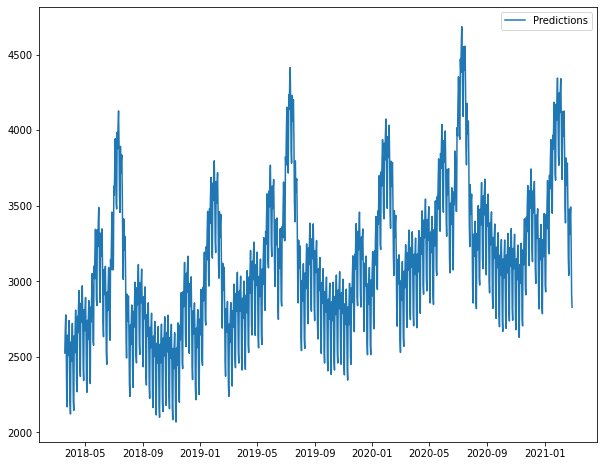

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(predictions.ds, predictions.yhat, label = "Predictions")
plt.legend()
plt.show()

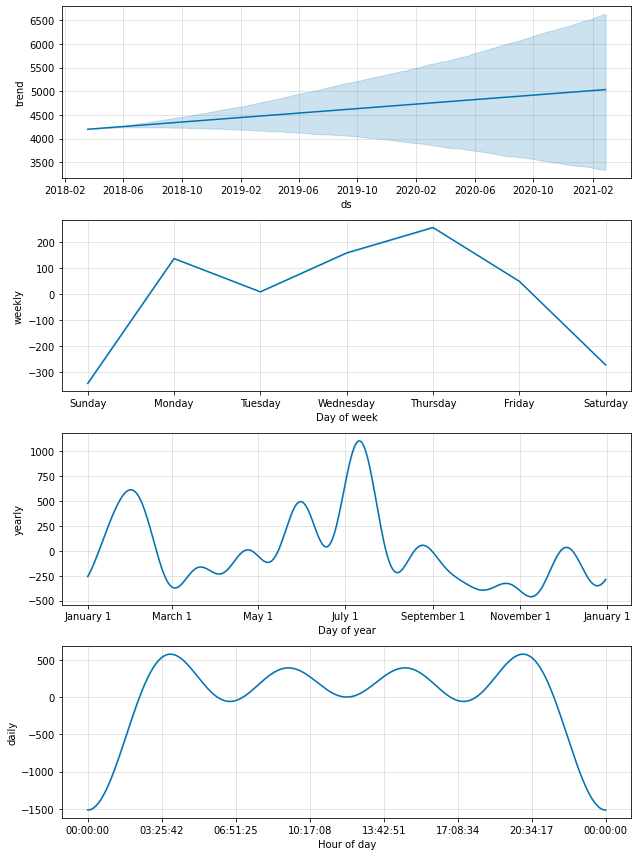

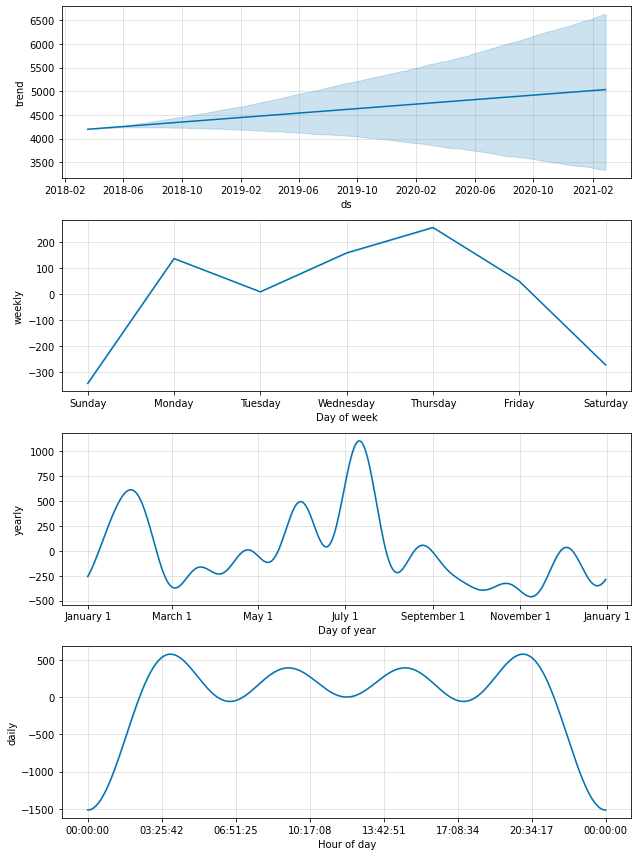

In [ ]:
model.plot_components(predictions)

# Mean Absolute Percentage Error (MAPE)

In [ ]:
y = np.array(test.y)
yp = np.array(predictions.yhat)
MAPE = np.mean(((np.abs((y-yp)/y)))*100)
print(f'The Mean Average Percentage Error (MAPE) is: {round(MAPE, 2)}')

The Mean Average Percentage Error (MAPE) is: 541.48


# Root Mean Square Error (RMSE)

In [ ]:
rmse = np.sqrt(metrics.mean_squared_error(np.array(test['y']), np.array(predictions['yhat'])))
print(f'The Root Mean Squared Error (RMSE) value is : %s' %(round(rmse,2)))

The Root Mean Squared Error (RMSE) value is : 3201.59


# Additional Instructions for (17-19)<br/>
# Multivariate Time Series Forecasting with Facebook Prophet<br/>
In the last exercise, we used only the dependent variable (ElecPrice) and the time component for our modeling (ds vs y). Next, we will build a time series model using the other variables. These variables will be added to the forecast model as a regressor on Facebook Prophet. So the 3 independent variables [‘SysLoad’,’Tmax’,’GasPrice’'] will be [‘add1’, ‘add2’, ‘add3’’] as the regressors. Split the data into train and test as done above and build a multivariate forecast model to forecast the last x-2757 days of ElecPrice. Answer question 17-19:

In [ ]:
df2.reset_index(inplace = True)

In [ ]:
df3 = df2.copy()

In [ ]:
df3 = df3.rename(columns = {'FullDate': 'ds',
                            'ElecPrice':'y',
                            'SysLoad': 'add1',
                            'Tmax': 'add2',
                            'GasPrice': 'add3'})

In [ ]:
train = df3[:2757]
test = df3[2757:]

In [ ]:
train.shape

(2757, 7)

In [ ]:
test.shape

(1077, 7)

# Prophet Model

In [ ]:
multi_model = Prophet(daily_seasonality = True)
multi_model.add_regressor('add1')
multi_model.add_regressor('add2')
multi_model.add_regressor('add3')
multi_model.fit(train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjmll_pmp/_jxfha3g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjmll_pmp/gud8nq64.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28039', 'data', 'file=/tmp/tmpjmll_pmp/_jxfha3g.json', 'init=/tmp/tmpjmll_pmp/gud8nq64.json', 'output', 'file=/tmp/tmpjmll_pmp/prophet_model7kkt1ca1/prophet_model-20230121072801.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:28:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:28:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# Mean Absolute Percentage Error (MAPE)

In [ ]:
y_pred = multi_model.predict(test)
y = np.array(test.y)
yp = np.array(y_pred.yhat)
MAPE = np.mean(((np.abs((y-yp)/y)))*100)
print(f'The Mean Average Percentage Error (MAPE) is: {round(MAPE, 2)}')

The Mean Average Percentage Error (MAPE) is: 230.09


# Root Mean Square Error (RMSE)

In [ ]:
rmse = np.sqrt(metrics.mean_squared_error(y,yp))
print('The Root Mean Squarfe (RMSE) value is : {}'.format(round(rmse,2)))

The Root Mean Squarfe (RMSE) value is : 2705.71


# Plotting Predictions

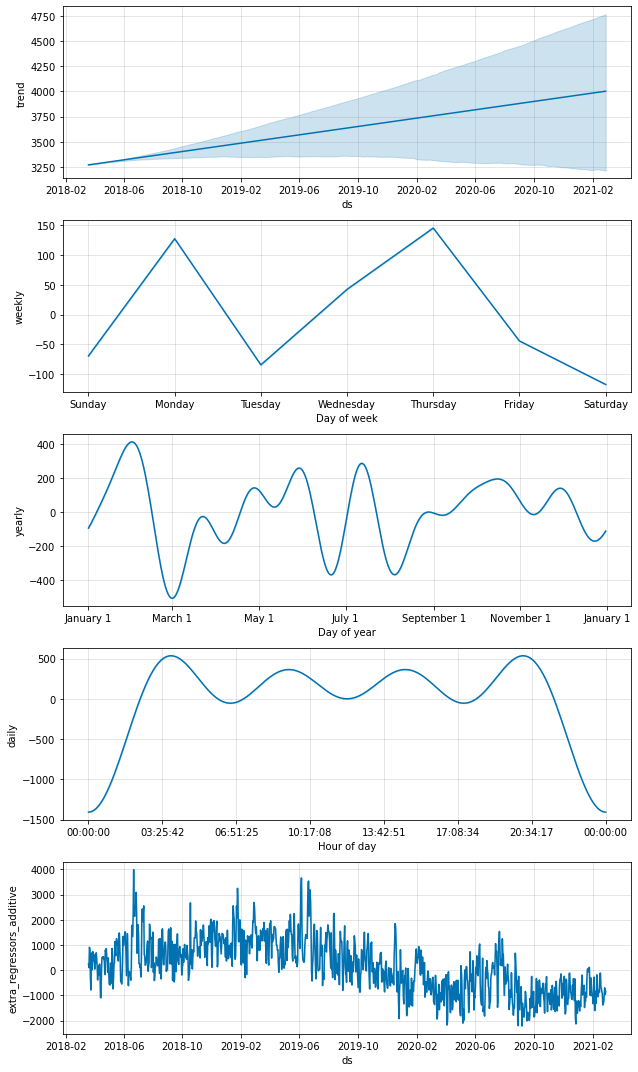

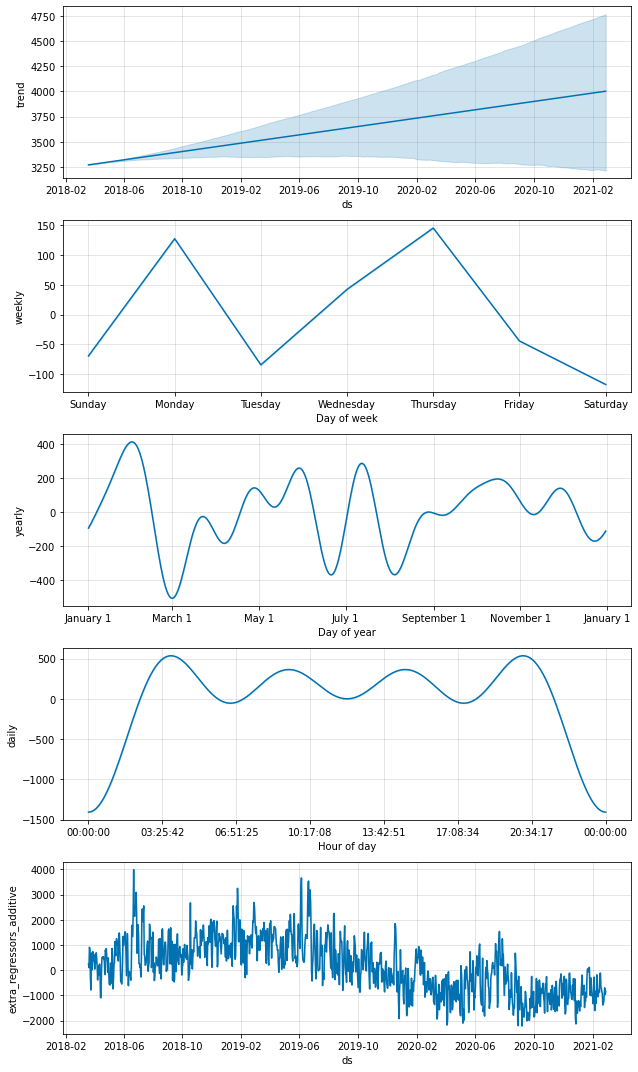

In [ ]:
multi_model.plot_components(y_pred)

# MAPE after dropping TMax

In [ ]:
df4 = df2.drop(['Tmax','level_0','index'], axis = 1)
df4.shape

(3834, 4)

In [ ]:
df4 = df4.rename(columns = {"FullDate": 'ds',"ElecPrice": "y", "SysLoad": "add1", "GasPrice": "add2"})

In [ ]:
train = df4[:2757]
test = df4[2757:]

In [ ]:
train.head()

,ds,add1,add2,y
0,2010-09-01,41565.380,88.56,2751.700
1,2010-09-02,38898.990,88.56,570.810
2,2010-09-03,41665.760,106.80,504.975
3,2010-09-04,35638.085,81.36,502.275
4,2010-09-05,35611.410,106.80,500.555


In [ ]:
multi_model = Prophet(daily_seasonality = True)
multi_model.add_regressor('add1')
multi_model.add_regressor('add2')
multi_model.fit(train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjmll_pmp/o2ksn73b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjmll_pmp/ooovq5i1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29376', 'data', 'file=/tmp/tmpjmll_pmp/o2ksn73b.json', 'init=/tmp/tmpjmll_pmp/ooovq5i1.json', 'output', 'file=/tmp/tmpjmll_pmp/prophet_model1qrv_mul/prophet_model-20230121075825.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:58:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:58:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
y_pred = multi_model.predict(test)
y = np.array(test.y)
yp= np.array(y_pred.yhat)
MAPE = np.mean(((np.abs((y-yp)/y)))*100)
print(f'The Mean Average Percentage Error (MAPE) is: {round(MAPE, 2)}')

The Mean Average Percentage Error (MAPE) is: 232.42
